In [305]:
#Importing the required Libraries

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [306]:
#Importing the dataset

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Imputing null values

In [ ]:
(leads.isnull().sum()/len(leads))*100

In [307]:
leads['Lead Source'].fillna(value='Others',inplace=True)

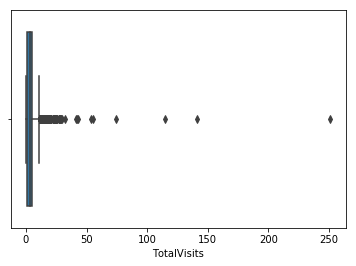

In [309]:
sns.boxplot(leads.TotalVisits)

In [310]:
leads['TotalVisits'].fillna(value=0,inplace=True)

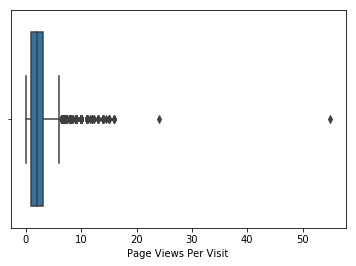

In [312]:
sns.boxplot(leads['Page Views Per Visit'])

In [313]:
leads['Page Views Per Visit'].fillna(value=0,inplace=True)

### Replacing 'Select' with appropriate values

In [314]:
leads['Lead Profile'].replace('Select','Other',inplace=True)
leads['Lead Profile'].fillna(value='Other',inplace=True)

In [315]:
leads['City'].replace('Select','Other',inplace=True)
leads['City'].fillna(value='Other',inplace=True)

In [316]:
leads['Tags'].fillna(value='Other',inplace=True)

In [317]:
print(leads['Lead Quality'].mode())
leads['Lead Quality'].fillna(value='Might be',inplace=True)

0    Might be
dtype: object


In [318]:
leads['What matters most to you in choosing a course'].fillna(value='Other',inplace=True)

In [319]:
leads['What is your current occupation'].replace('Select','Other',inplace=True)
leads['What is your current occupation'].fillna(value='Other',inplace=True)

In [320]:
leads['How did you hear about X Education'].replace('Select','Other',inplace=True)
leads['How did you hear about X Education'].fillna(value='Other',inplace=True)

In [321]:
leads['Specialization'].replace('Select','Other',inplace=True)
leads['Specialization'].fillna(value='Other',inplace=True)

In [322]:
leads['Country'].fillna(value='unknown',inplace=True)

In [325]:
leads['Asymmetrique Activity Index'].replace('02.Medium',2, inplace=True)
leads['Asymmetrique Activity Index'].replace('01.High',1, inplace=True)
leads['Asymmetrique Activity Index'].replace('03.Low',3, inplace=True)

In [326]:
leads['City'].replace('Other','Other Cities',inplace = True)

In [327]:
leads['Asymmetrique Profile Index'].replace('02.Medium',2, inplace=True)
leads['Asymmetrique Profile Index'].replace('01.High',1, inplace=True)
leads['Asymmetrique Profile Index'].replace('03.Low',3, inplace=True)

In [329]:
leads['Asymmetrique Activity Index'].fillna(value=0,inplace=True)
leads['Asymmetrique Profile Index'].fillna(value=0,inplace=True)
leads['Asymmetrique Activity Score'].fillna(value=0,inplace=True)
leads['Asymmetrique Profile Score'].fillna(value=0,inplace=True)

In [ ]:
(leads.isnull().sum()/len(leads))*100

In [330]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2.0,1.0,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,2.0,1.0,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,2.0,1.0,15.0,18.0,No,No,Modified


### Treating Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x23e41d2cb00>,
 'caps': [<matplotlib.lines.Line2D at 0x23e41d36400>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e41d2c9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x23e41d36c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e41d3e0b8>],
 'means': []}

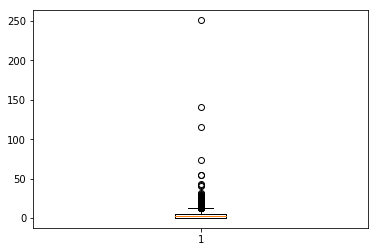

In [331]:
plt.boxplot(leads['TotalVisits'])

In [332]:
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x23e41d7eba8>,
 'caps': [<matplotlib.lines.Line2D at 0x23e41d884a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e41d7ea58>],
 'medians': [<matplotlib.lines.Line2D at 0x23e41d88cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e41d8f160>],
 'means': []}

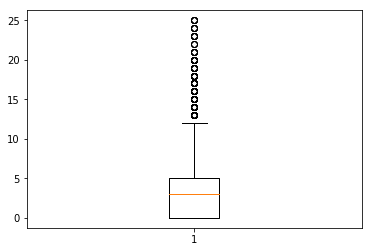

In [333]:
plt.boxplot(leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23e41dd6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x23e41de2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e41dd6b00>],
 'medians': [<matplotlib.lines.Line2D at 0x23e41de2da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e41deb208>],
 'means': []}

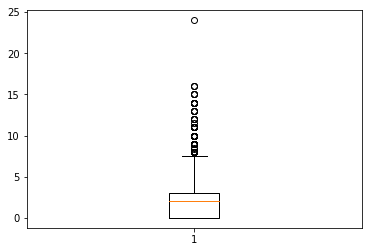

In [334]:
plt.boxplot(leads['Page Views Per Visit'])

In [335]:
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x23e41e36198>,
 'caps': [<matplotlib.lines.Line2D at 0x23e41e36a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e41e36048>],
 'medians': [<matplotlib.lines.Line2D at 0x23e41e3d2e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e41e3d710>],
 'means': []}

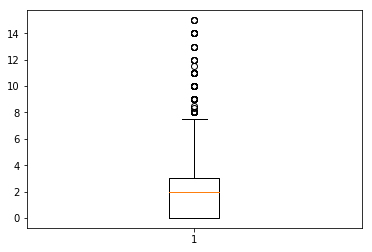

In [336]:
plt.boxplot(leads['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23e42d60b38>,
 'caps': [<matplotlib.lines.Line2D at 0x23e42d69438>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e42d609e8>],
 'medians': [<matplotlib.lines.Line2D at 0x23e42d69c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e42d700f0>],
 'means': []}

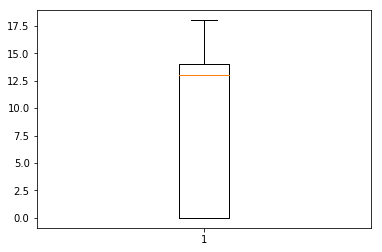

In [337]:
plt.boxplot(leads['Asymmetrique Activity Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23e42dbda20>,
 'caps': [<matplotlib.lines.Line2D at 0x23e42dc7320>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e42dbd8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23e42dc7b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e42dc7f98>],
 'means': []}

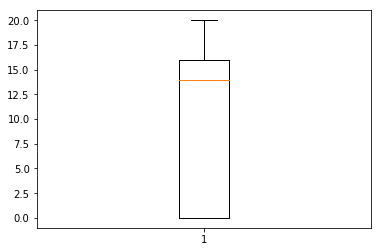

In [338]:
plt.boxplot(leads['Asymmetrique Profile Score'])

In [339]:
leads.shape

(9214, 37)

In [340]:
#prospect id and lead number doesnt affect converted or not
Prospect_ID=leads.pop('Prospect ID')
lead_number=leads.pop('Lead Number')

In [341]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2.0,1.0,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,2.0,1.0,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,2.0,1.0,15.0,18.0,No,No,Modified


In [342]:
#Getting the numeric columns for pca
numeric_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
leads_numeric=leads[numeric_columns]
leads.drop(columns=numeric_columns,inplace=True)

In [343]:
#dropping all single value columns
single_value_columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads.drop(columns=single_value_columns,inplace=True)

In [344]:
#creating dummies for all the categorical columns at once
to_be_dummied_cols=['Do Not Call','Do Not Email','Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Search','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']
leads=pd.get_dummies(data=leads,columns=to_be_dummied_cols,drop_first=True)
leads.head()

,Converted,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other,Le

In [345]:
#Generating PCA for numeric columns
X = leads_numeric.copy()
pca = PCA(random_state=34)
pca.fit(X)

#looking at pca components
pca.components_

array([[ 1.87702431e-03,  9.99997366e-01,  1.19147359e-03,
         1.20878031e-04,  5.57403430e-04],
       [ 1.38891751e-02, -5.29345691e-04,  2.88478543e-03,
         6.56250246e-01,  7.54409771e-01],
       [ 8.91569410e-01, -2.21530388e-03,  4.50668858e-01,
        -4.10754428e-02,  1.75916998e-02],
       [ 4.25593290e-01,  2.74027830e-04, -8.02624819e-01,
         3.12948857e-01, -2.76995828e-01],
       [ 1.54200864e-01, -7.25963131e-05, -3.90744466e-01,
        -6.85354960e-01,  5.94835632e-01]])

In [346]:
#looking at the pca variance ratio
pca.explained_variance_ratio_

array([9.99556605e-01, 3.93308223e-04, 3.92691318e-05, 6.12208694e-06,
       4.69545822e-06])

<BarContainer object of 5 artists>

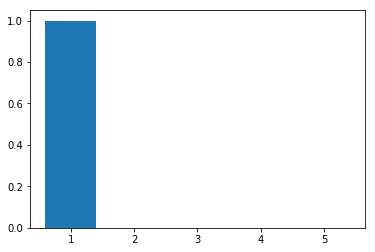

In [347]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

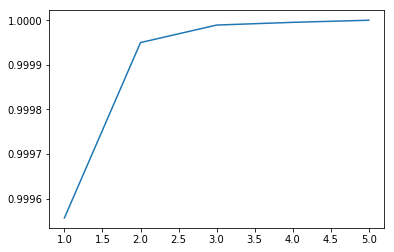

In [348]:
#cumulaitve sum of variance of pca components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

After 2 components, variance is not affected much

In [349]:
#Again generating pca with 2 components
pc2 = PCA(n_components=2, random_state=34)
newdata = pc2.fit_transform(X)
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-487.820335,9.559873
1,186.190253,9.279752
2,1044.184432,11.898262
3,-182.817197,9.611516
4,940.182521,11.097860


In [350]:
#Concatenating the pca and dummies together
df=pd.concat([df,leads],axis=1)

#Getting the X and Y varibles
x=df
y=leads.pop('Converted')

,PC1,PC2,Converted,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_

In [295]:
#do test train split
#do scaliing
#modelling